<a href="https://colab.research.google.com/github/j4ik2i5x0/Network-IDS/blob/main/ids3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the clean_df function
def clean_df(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Handle missing values (replace NaNs with zeros)
    df = df.fillna(0)

    return df

# Concatenate CSV files and clean the DataFrame
dataset_csv_path = '/content/drive/MyDrive/CICIDS2017/MachineLearningCSV/MachineLearningCVE/'
csv_file_names = ['Wednesday-workingHours.pcap_ISCX.csv','Tuesday-WorkingHours.pcap_ISCX.csv','Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv','Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv','Monday-WorkingHours.pcap_ISCX.csv','Friday-WorkingHours-Morning.pcap_ISCX.csv','Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv','Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv']
complete_paths = [dataset_csv_path + csv_file_name for csv_file_name in csv_file_names]
df = pd.concat(map(pd.read_csv, complete_paths), ignore_index=True)
df = clean_df(df)

df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,61374,61,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,61378,72,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,61375,75,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,61323,48,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
 #   Get the current column names
columns = df.columns.tolist()

# Find the index of the 'Label' column
label_index = columns.index(' Label')

# Replace 'Label' with 'LABEL'
columns[label_index] = 'LABEL'

# Assign the modified column names back to the DataFrame
df.columns = columns

# Check if the column name has been successfully changed
print(df.columns)

df_encoded = pd.get_dummies(df, columns=['LABEL'])

# Print the first few rows to verify the encoding
print(df_encoded.head())

# For example, exploring the dataset and preparing features and labels
print("Original Dataset Shape:", df.shape)
print(df['LABEL'].value_counts())

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])



num_classes = df.LABEL.nunique()
print("Number of classes:", num_classes)

Number of classes: 15


In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,LABEL
0,-0.453337,-0.469648,-0.011680,-0.010000,-0.057211,-0.007561,-0.297676,-0.217037,-0.293962,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
1,-0.437095,-0.470722,0.000911,-0.006214,-0.041528,-0.007428,-0.201136,-0.315730,-0.244672,-0.154411,...,0.002708,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
2,-0.452916,-0.470705,-0.000348,-0.005268,0.239814,-0.006250,1.777274,-0.315730,1.286588,1.870933,...,0.002708,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
3,-0.437095,-0.470304,0.008466,0.000411,0.268344,-0.004786,1.430788,-0.315730,0.714003,1.174213,...,0.002708,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
4,-0.452916,-0.470705,-0.001607,-0.005268,0.239814,-0.006249,1.777274,-0.315730,1.465615,2.079656,...,0.002708,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,2.768413,-0.470734,-0.011680,-0.010000,-0.057211,-0.007561,-0.297676,-0.217037,-0.293962,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
2830739,2.768623,-0.470734,-0.011680,-0.010000,-0.057211,-0.007561,-0.297676,-0.217037,-0.293962,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
2830740,2.768465,-0.470734,-0.011680,-0.010000,-0.057211,-0.007561,-0.297676,-0.217037,-0.293962,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
2830741,2.765732,-0.470735,-0.010421,-0.010946,-0.056644,-0.007564,-0.297676,-0.217037,-0.293962,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0


In [ ]:
df.LABEL.value_counts()

LABEL
0     2096484
4      172849
2      128016
10      90819
3       10286
7        5933
6        5385
5        5228
11       3219
1        1953
12       1470
14        652
9          36
13         21
8          11
Name: count, dtype: int64

In [ ]:
df_minor = df[(df['LABEL']==6)|(df['LABEL']==1)|(df['LABEL']==4)]
df_major = df.drop(df_minor.index)
X = df_major.drop(['LABEL'],axis=1)
y = df_major.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,LABEL
0,-0.453337,-0.469648,-0.011680,-0.010000,-0.057211,-0.007561,-0.297676,-0.217037,-0.293962,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
1,-0.437095,-0.470722,0.000911,-0.006214,-0.041528,-0.007428,-0.201136,-0.315730,-0.244672,-0.154411,...,0.002708,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
2,-0.452916,-0.470705,-0.000348,-0.005268,0.239814,-0.006250,1.777274,-0.315730,1.286588,1.870933,...,0.002708,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
3,-0.437095,-0.470304,0.008466,0.000411,0.268344,-0.004786,1.430788,-0.315730,0.714003,1.174213,...,0.002708,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
4,-0.452916,-0.470705,-0.001607,-0.005268,0.239814,-0.006249,1.777274,-0.315730,1.465615,2.079656,...,0.002708,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,2.768413,-0.470734,-0.011680,-0.010000,-0.057211,-0.007561,-0.297676,-0.217037,-0.293962,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
2830739,2.768623,-0.470734,-0.011680,-0.010000,-0.057211,-0.007561,-0.297676,-0.217037,-0.293962,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
2830740,2.768465,-0.470734,-0.011680,-0.010000,-0.057211,-0.007561,-0.297676,-0.217037,-0.293962,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0
2830741,2.765732,-0.470735,-0.010421,-0.010946,-0.056644,-0.007564,-0.297676,-0.217037,-0.293962,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.10708,-0.375644,-0.116044,-0.381002,-0.361637,0


In [ ]:
from sklearn.impute import SimpleImputer

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace infinite values with a large finite value
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(1e12, inplace=True)  # Replace NaN values with a large finite value

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Scale features
scaler = StandardScaler()
X_train_imputed_scaled = scaler.fit_transform(X_train_imputed)

# Encode the string labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X_train_reshaped = X_train_imputed_scaled.reshape(X_train_imputed_scaled.shape[0], -1)  # Flatten to 2D array
X_test_reshaped = X_test.values.reshape(X_test.shape[0], -1)  # Flatten to 2D array

# Combine features and labels for training and testing datasets
train_df = pd.DataFrame(X_train_reshaped)
train_df['label'] = y_train_encoded

test_df = pd.DataFrame(X_test_reshaped)
test_df['label'] = y_test_encoded

# Save the datasets to CSV files in Google Drive

test_df.to_csv('/content/drive/MyDrive/test_dataset.csv', index=False)

In [ ]:
train_df.to_csv('/content/drive/MyDrive/train_dataset.csv', index=False)

In [ ]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,label
0,2.064057,-0.393884,-0.010271,-0.009902,-0.053175,-0.007536,-0.288627,-0.329402,-0.315671,-0.240008,...,0.003029,-0.135796,-0.113887,-0.162440,-0.110761,-0.300449,-0.113328,-0.301938,-0.282463,0
1,1.108194,-0.393884,-0.011440,-0.009902,-0.053006,-0.007534,-0.286068,-0.297425,-0.305775,-0.240008,...,0.003023,-0.135796,-0.113887,-0.162440,-0.110761,-0.300449,-0.113328,-0.301938,-0.282463,7
2,-0.473569,-0.172395,-0.006765,-0.010774,-0.050644,-0.007536,-0.280949,-0.233469,-0.285984,-0.240008,...,0.003020,-0.134370,-0.113887,-0.161533,-0.109177,0.158864,-0.113328,0.123496,0.193328,1
3,-0.455022,-0.392935,-0.010271,-0.010774,-0.052162,-0.007536,-0.280949,-0.233469,-0.285984,-0.240008,...,0.003020,-0.135796,-0.113887,-0.162440,-0.110761,-0.300449,-0.113328,-0.301938,-0.282463,0
4,-0.455022,1.658925,0.015440,0.010156,0.063923,-0.005335,0.196397,-0.329402,-0.029526,0.066259,...,0.003029,6.961865,-0.113887,4.351212,7.773929,3.611561,-0.113328,3.321530,3.769896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873735,2.052050,-0.393885,-0.011440,-0.009902,-0.053175,-0.007536,-0.288627,-0.329402,-0.315671,-0.240008,...,0.003029,-0.135796,-0.113887,-0.162440,-0.110761,-0.300449,-0.113328,-0.301938,-0.282463,0
1873736,-0.474948,-0.393871,-0.011440,-0.009902,-0.048281,-0.007488,-0.214402,0.597949,-0.028701,-0.240008,...,0.003020,-0.135796,-0.113887,-0.162440,-0.110761,-0.300449,-0.113328,-0.301938,-0.282463,0
1873737,1.693422,-0.393884,-0.011440,-0.009902,-0.053175,-0.007536,-0.288627,-0.329402,-0.315671,-0.240008,...,0.003029,-0.135796,-0.113887,-0.162440,-0.110761,-0.300449,-0.113328,-0.301938,-0.282463,0
1873738,-0.473569,2.340400,-0.003259,-0.005541,-0.048450,-0.002991,-0.263032,-0.329402,-0.281037,-0.221571,...,0.003020,-0.134363,-0.113887,-0.161529,-0.109169,2.537279,10.126262,4.372899,0.359530,1


In [ ]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,label
0,-0.454756,-0.469833,-0.010421,-0.009054,-0.051731,-0.007478,-0.263292,0.210634,-0.160971,-0.260373,...,0.002708,-0.133328,-0.110847,-0.158407,-0.107080,-0.375644,-0.116044,-0.381002,-0.361637,0
1,-0.434257,-0.440657,-0.009162,-0.008107,-0.057778,-0.007556,-0.305611,-0.315730,-0.324653,-0.260373,...,0.002704,-0.133328,-0.110847,-0.158407,-0.107080,-0.375644,-0.116044,-0.381002,-0.361637,0
2,-0.453337,0.125420,-0.010421,-0.010000,-0.057022,-0.007564,-0.295032,-0.315730,-0.304193,-0.241314,...,0.002708,-0.133328,-0.110847,-0.158407,-0.107080,-0.375644,-0.116044,-0.381002,-0.361637,3
3,-0.454756,-0.470054,-0.010421,-0.009054,-0.051353,-0.007478,-0.260647,0.243531,-0.150741,-0.260373,...,0.002708,-0.133328,-0.110847,-0.158407,-0.107080,-0.375644,-0.116044,-0.381002,-0.361637,0
4,-0.454756,-0.469380,-0.011680,-0.010000,-0.052582,-0.007518,-0.232876,0.588958,-0.043325,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.107080,-0.375644,-0.116044,-0.381002,-0.361637,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468430,-0.453337,-0.309999,-0.009162,-0.010000,-0.057778,-0.007564,-0.305611,-0.315730,-0.324653,-0.260373,...,0.002708,-0.133328,-0.110847,-0.158407,-0.107080,-0.375644,-0.116044,-0.381002,-0.361637,0
468431,-0.434257,2.853137,0.019799,0.009875,0.293947,-0.005719,0.835678,-0.315730,0.407783,0.736122,...,0.002697,0.152991,1.269974,1.620355,-0.069653,0.026836,-0.112591,0.009460,0.043236,0
468432,-0.454756,-0.470728,-0.010421,-0.009054,-0.049275,-0.007513,-0.246100,0.424469,-0.094476,-0.260373,...,0.002697,-0.133328,-0.110847,-0.158407,-0.107080,-0.375644,-0.116044,-0.381002,-0.361637,0
468433,-0.454756,-0.470731,-0.010421,-0.009054,-0.050220,-0.007478,-0.252713,0.342225,-0.120051,-0.260373,...,0.002708,-0.133328,-0.110847,-0.158407,-0.107080,-0.375644,-0.116044,-0.381002,-0.361637,0


In [ ]:
print("Shape of Features (X_train_reshaped):", X_train_reshaped.shape)
print("Shape of Labels (y_train):", y_train_encoded.shape)
print("Shape of Features (X_test):", X_test_reshaped.shape)
print("Shape of Labels (y_test):", y_test_encoded.shape)

Shape of Features (X_train_reshaped): (1873740, 78)
Shape of Labels (y_train): (1873740,)
Shape of Features (X_test): (468435, 78)
Shape of Labels (y_test): (468435,)


In [ ]:
!pip install imbalanced-learn

pd.Series(y_train_encoded).value_counts()

0     1677049
1      102392
7       72775
2        8205
4        4781
3        4204
8        2605
9        1161
11        519
6          27
10         16
5           6
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

# Determine the desired number of samples for each class in the sampling strategy
sampling_strategy = {2: 8205, 4: 4781}

# Initialize SMOTE with the updated sampling strategy
smote = SMOTE(n_jobs=-1, sampling_strategy=sampling_strategy)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed_scaled, y_train_encoded)

# Check the value counts after resampling
pd.Series(y_train_resampled).value_counts()

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


0     1677049
1      102392
7       72775
2        8205
4        4781
3        4204
8        2605
9        1161
11        519
6          27
10         16
5           6
Name: count, dtype: int64

In [ ]:
#CNN model
model_cnn = Sequential()


model_cnn.add(Conv1D(64, 3, padding="same", activation="relu", input_shape=(X_train_reshaped.shape[1], 1)))
model_cnn.add(Conv1D(64, 3, padding="same", activation="relu"))
model_cnn.add(MaxPooling1D(pool_size=(2)))
model_cnn.add(Conv1D(128, 3, padding="same", activation="relu"))
model_cnn.add(Conv1D(128, 3, padding="same", activation="relu"))
model_cnn.add(MaxPooling1D(pool_size=(2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation="relu"))
model_cnn.add(Dropout(0.5))


num_classes = len(np.unique(y_train_resampled))  # Number of unique classes in your dataset
model_cnn.add(Dense(num_classes, activation="softmax"))

# Compile the model
model_cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 78, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 78, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1  (None, 39, 64)            0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 39, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 39, 128)           49280     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 19, 128)           0         
 g1D)                                                   

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/your_model_path/best_model.h5',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               verbose=1,
                               mode='min',
                               restore_best_weights=True)

# Train the model
history = model_cnn.fit(X_train_reshaped,
                        y_train_resampled,
                        epochs=10,
                        batch_size=64,
                        validation_data=(X_test_reshaped, y_test_encoded),
                        callbacks=[checkpoint,early_stopping])



# Evaluate the model on the test set
loss, accuracy = model_cnn.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
29278/29278 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9848
Epoch 1: val_loss improved from inf to 0.04673, saving model to /content/drive/MyDrive/your_model_path/best_model.h5
29278/29278 [==============================] - 349s 12ms/step - loss: 0.0358 - accuracy: 0.9848 - val_loss: 0.0467 - val_accuracy: 0.9840
Epoch 2/10
   11/29278 [..............................] - ETA: 5:30 - loss: 0.0433 - accuracy: 0.9815

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29276/29278 [============================>.] - ETA: 0s - loss: 0.0293 - accuracy: 0.9870
Epoch 2: val_loss did not improve from 0.04673
29278/29278 [==============================] - 348s 12ms/step - loss: 0.0293 - accuracy: 0.9870 - val_loss: 0.0631 - val_accuracy: 0.9805
Epoch 3/10
29275/29278 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9874
Epoch 3: val_loss did not improve from 0.04673
29278/29278 [==============================] - 349s 12ms/step - loss: 0.0287 - accuracy: 0.9874 - val_loss: 0.0832 - val_accuracy: 0.9793
Epoch 4/10
29275/29278 [============================>.] - ETA: 0s - loss: 0.0288 - accuracy: 0.9874
Epoch 4: val_loss did not improve from 0.04673
29278/29278 [==============================] - 349s 12ms/step - loss: 0.0288 - accuracy: 0.9874 - val_loss: 0.1371 - val_accuracy: 0.9756
Epoch 5/10
29278/29278 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9875
Epoch 5: val_loss did not improve from 0.04673
29278/292

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import load_model




In [ ]:
y_pred = model_cnn.predict(X_test_reshaped)
y_pred_binary = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_encoded, y_pred_binary, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test_encoded, y_pred_binary, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_encoded, y_pred_binary, average='weighted')
print("F1 Score:", f1)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred, average='weighted', multi_class='ovo')
print("ROC AUC Score:", roc_auc)

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_binary))

14639/14639 [==============================] - 63s 4ms/step
Confusion Matrix:
[[417960     18      6    129      3      0      0   1319      0      0
       0      0]
 [   784  24840      0      0      0      0      0      0      0      0
       0      0]
 [   340      0   1739      2      0      0      0      0      0      0
       0      0]
 [   110      0      0    914      0      0      0      0      0      0
       0      0]
 [   596      0      0      0    556      0      0      0      0      0
       0      0]
 [     5      0      0      0      0      0      0      0      0      0
       0      0]
 [     9      0      0      0      0      0      0      0      0      0
       0      0]
 [  3551      0      0      0      0      0      0  14493      0      0
       0      0]
 [   156      0      0      0      6      0      0      4    448      0
       0      0]
 [   309      0      0      0      0      0      0      0      0      0
       0      0]
 [     5      0      0      0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.9827578870622541
Recall: 0.9840212622882577
F1 Score: 0.98293818697701
ROC AUC Score: 0.9563665368624263
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    419435
           1       1.00      0.97      0.98     25624
           2       1.00      0.84      0.91      2081
           3       0.87      0.89      0.88      1024
           4       0.98      0.48      0.65      1152
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         9
           7       0.92      0.80      0.86     18044
           8       1.00      0.73      0.84       614
           9       0.00      0.00      0.00       309
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00       133

    accuracy                           0.98    468435
   macro avg       0.56      0.48      0.51    468435
weighted avg       0.98      0.98      0.98    468435



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Save the trained model
model_cnn.save("/content/drive/MyDrive/your_model_path/cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


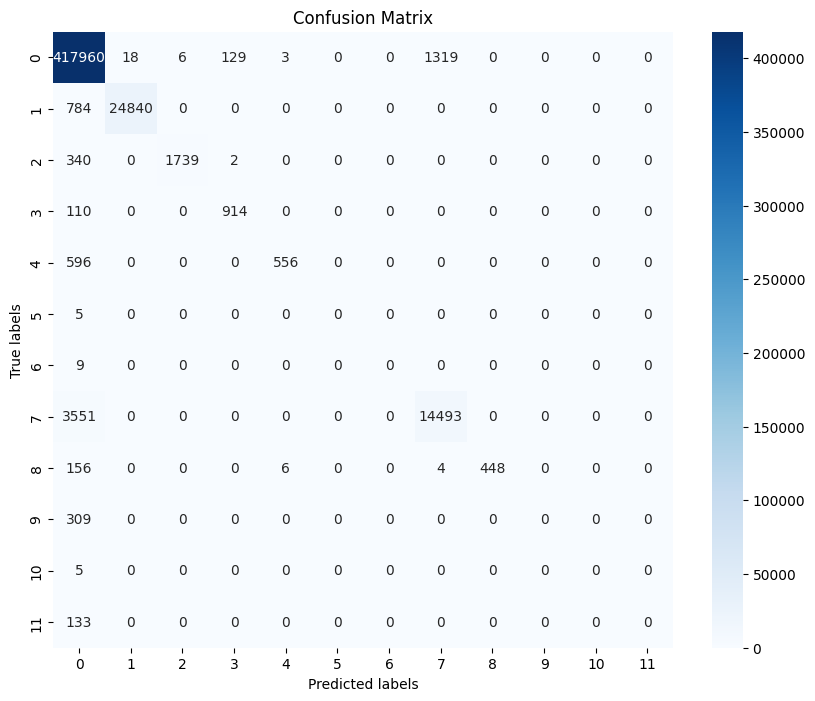

14639/14639 [==============================] - 63s 4ms/step


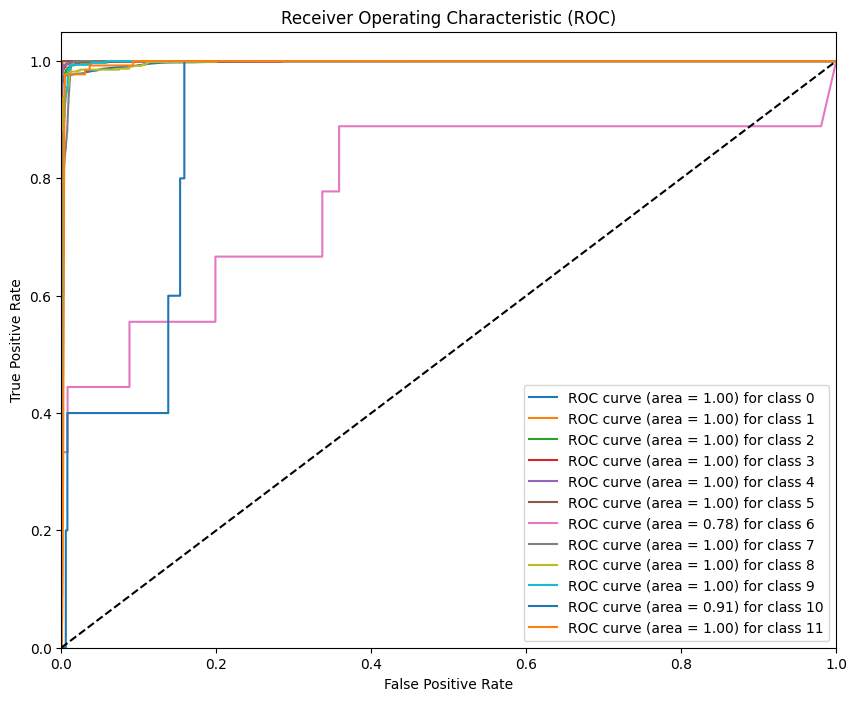

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Binarize the test labels
y_test_binary = label_binarize(y_test_encoded, classes=range(num_classes))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
# Assuming your model is multi-class classification
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Compute class probabilities using predict method
y_pred_prob = model_cnn.predict(X_test_reshaped)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



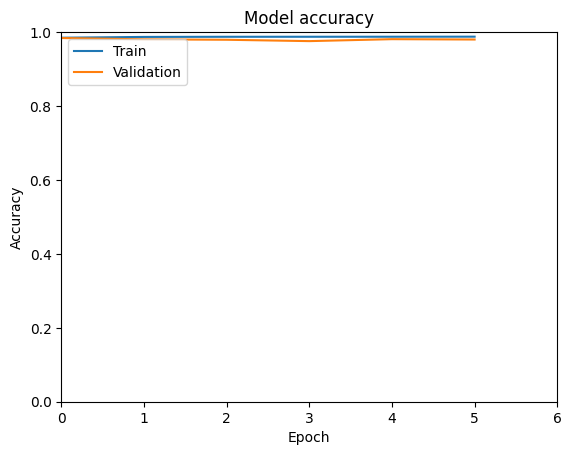

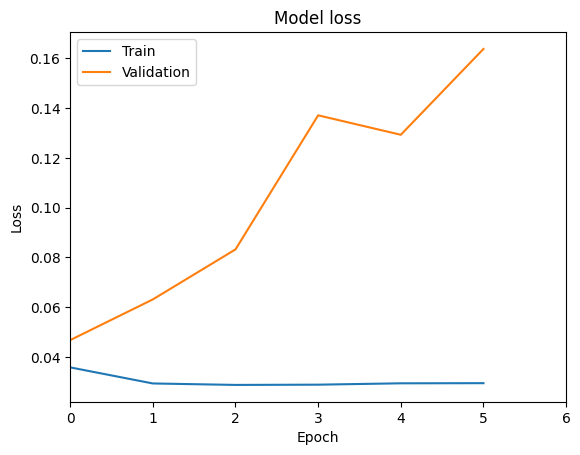

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim([0, 1])  # Set the y-axis limit to range from 0 to 1
plt.xlim([0, len(history.history['accuracy'])])  # Set the x-axis limit from 0 to the number of epochs
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.xlim([0, len(history.history['loss'])])  # Set the x-axis limit from 0 to the number of epochs
plt.show()
